In [1]:
import numpy as np

X = np.load('model_train/train/inputs.npy')
T = np.load('model_train/train/targets.npy')

classes = int(T.max()) + 1
X.shape, T.shape, classes

((8606, 256, 256), (8606,), 232)

In [2]:
import torch
from ipynb.fs.defs.model import create_model
from torch.nn import CrossEntropyLoss
from torch.optim import AdamW

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = create_model(classes, device)

optim = AdamW(model.parameters())
loss_fn = CrossEntropyLoss()

In [3]:
N = X.shape[0]
X = X.reshape((N, 1, 256, 256))

X_train = torch.tensor(X, device=device, dtype=torch.float32)
y_train = torch.tensor(T, device=device, dtype=torch.long)

o = model(X_train[:1])
loss_fn(o, y_train[:1])

tensor(5.4466, device='cuda:0', grad_fn=<NllLossBackward0>)

In [4]:
from ipynb.fs.defs.model import train

t_l, v_l = train(model, 20, X_train, y_train, optim, loss_fn, bs=128, random_seed=1234)

Starting training.
Number of minibatches for training/test: 54/14
Starting epoch 1 of 20


c:\Users\cupof\repos\audio-project\.venv\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
c:\Users\cupof\repos\audio-project\.venv\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


	Training took: 245.74s	with loss: 5.401314
Starting epoch 2 of 20
	Training took: 394.21s	with loss: 5.403354
Starting epoch 3 of 20
	Training took: 462.27s	with loss: 5.403263
Starting epoch 4 of 20
	Training took: 678.07s	with loss: 5.403262
Starting epoch 5 of 20
	Training took: 486.84s	with loss: 5.403376
Starting epoch 6 of 20
	Training took: 334.17s	with loss: 5.403340
Starting epoch 7 of 20
	Training took: 362.69s	with loss: 5.403108
Starting epoch 8 of 20
	Training took: 424.09s	with loss: 5.403313
Starting epoch 9 of 20
	Training took: 304.99s	with loss: 5.403543
Starting epoch 10 of 20
	Training took: 511.40s	with loss: 5.403416
Starting epoch 11 of 20
	Training took: 574.21s	with loss: 5.403378
Starting epoch 12 of 20
	Training took: 343.47s	with loss: 5.403545
Starting epoch 13 of 20
	Training took: 327.08s	with loss: 5.403465
Starting epoch 14 of 20
	Training took: 298.37s	with loss: 5.402803
Starting epoch 15 of 20
	Training took: 514.65s	with loss: 5.391085
Starting epo

In [5]:
np.save('train_losses.npy', t_l)
np.save('valid_losses.npy', v_l)

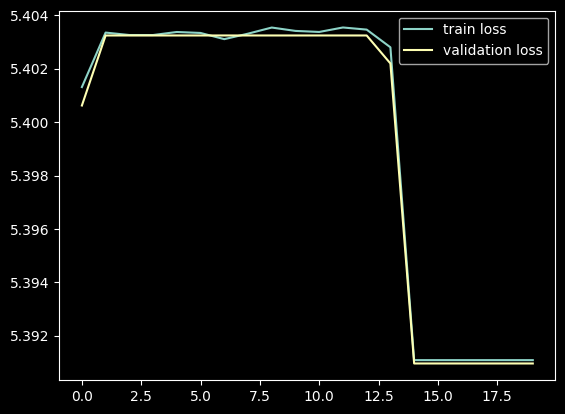

In [6]:
import matplotlib.pyplot as plt

ax = plt.subplot()
ax.plot(np.arange(20), t_l, label='train loss')
ax.plot(np.arange(20), v_l, label='validation loss')
plt.legend()